![](https://images-na.ssl-images-amazon.com/images/G/01/subsamazon/merch/abb/AmazonBookBox_books_page_content_grid_440x344._CB418110359_.jpg)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [3]:
data = pd.read_csv('../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
data.duplicated().sum()

0

In [5]:
data = data.rename(columns={'User Rating': 'Rating'})

In [6]:
data.isna().sum().to_frame('Null Values')

,Null Values
Name,0
Author,0
Rating,0
Reviews,0
Price,0
Year,0
Genre,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     550 non-null    object 
 1   Author   550 non-null    object 
 2   Rating   550 non-null    float64
 3   Reviews  550 non-null    int64  
 4   Price    550 non-null    int64  
 5   Year     550 non-null    int64  
 6   Genre    550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [8]:
data.nunique().to_frame('Count')

,Count
Name,351
Author,248
Rating,14
Reviews,346
Price,40
Year,11
Genre,2


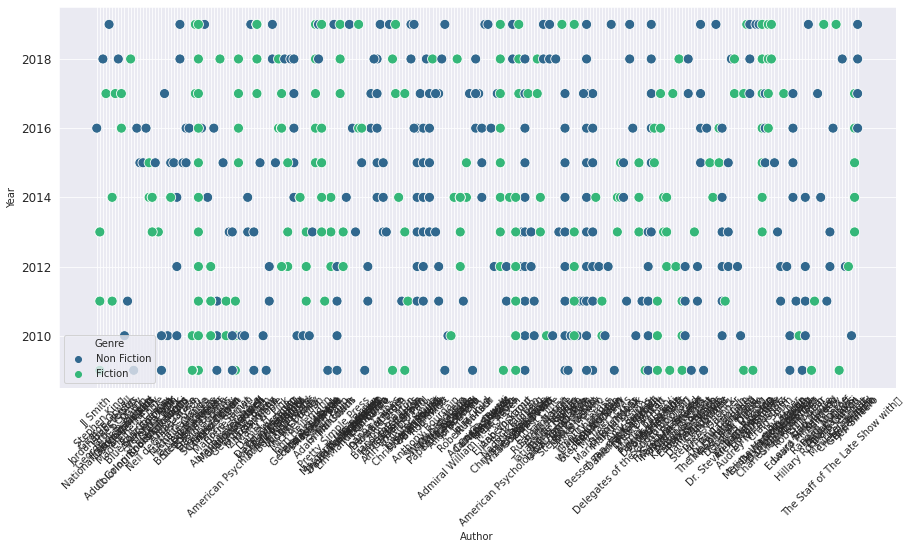

In [9]:
plt.figure(figsize=(15,7))
sns.scatterplot(data.Author, data.Year, hue=data.Genre, s=100, palette='viridis')
plt.yticks(fontsize=12)
plt.xticks(rotation=45)
plt.show()

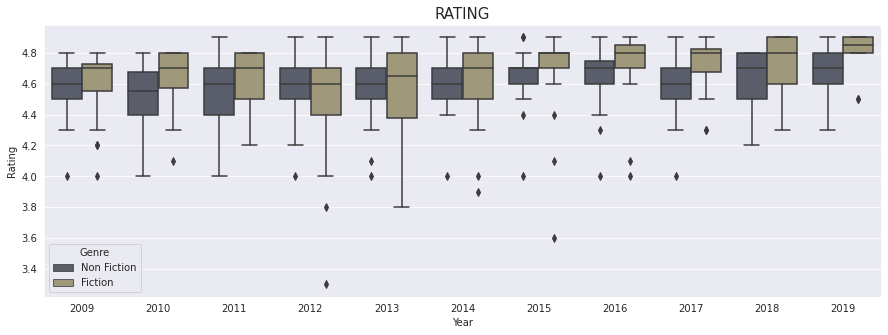

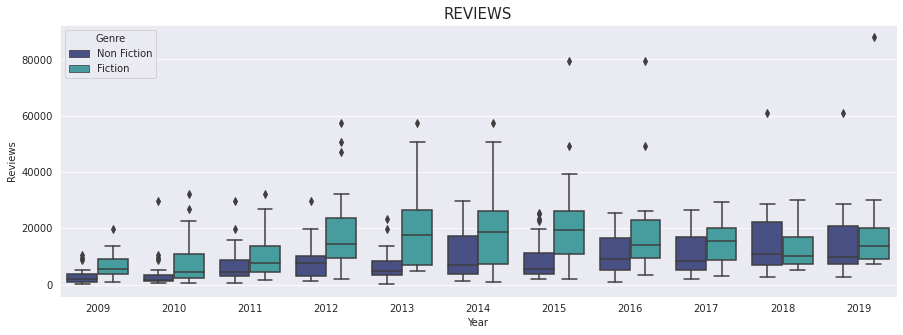

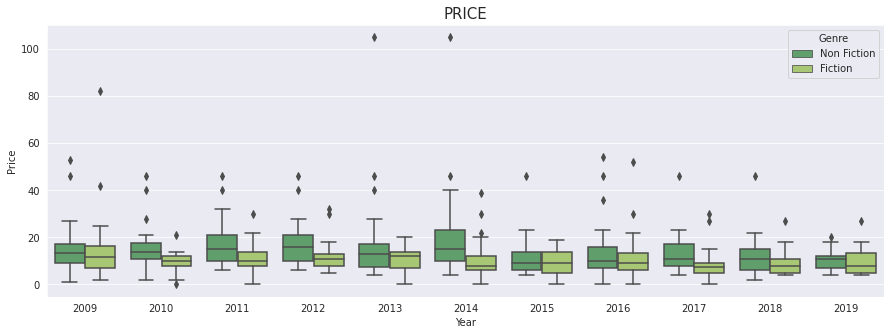

In [10]:
plt.figure(figsize=(15,5))
plt.title('RATING', fontsize=15)
sns.boxplot(data.Year, data.Rating, hue=data.Genre, palette='cividis')
plt.show()
plt.figure(figsize=(15,5))
plt.title('REVIEWS', fontsize=15)
sns.boxplot(data.Year, data.Reviews, hue=data.Genre, palette='mako')
plt.show()
plt.figure(figsize=(15,5))
plt.title('PRICE', fontsize=15)
sns.boxplot(data.Year, data.Price, hue=data.Genre, palette='summer')
plt.show()

,Count
Non Fiction,310
Fiction,240


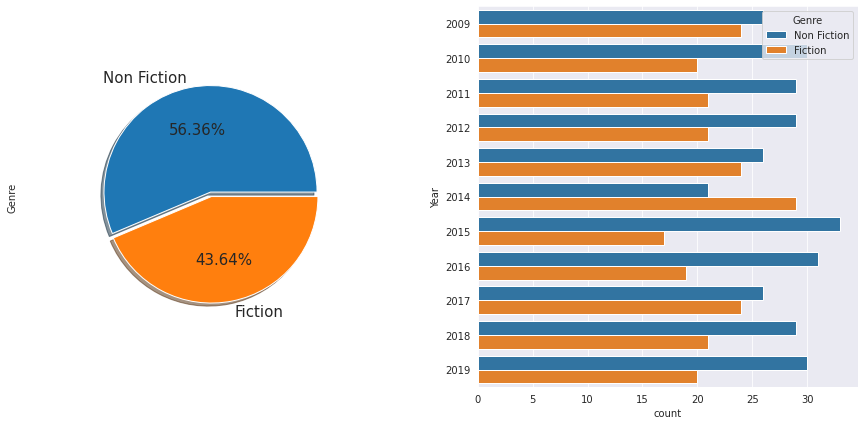

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
data.Genre.value_counts().plot.pie(shadow=True, radius=0.7, autopct='%1.2f%%',
                       textprops = {"fontsize":15}, explode=(0.03, 0), ax=ax[0])
sns.countplot(y=data.Year, hue=data.Genre, ax=ax[1])
fig.show()
data.Genre.value_counts().to_frame('Count')

### Extracting Necessary Data

In [12]:
data.iloc[531:533].style.set_properties(**{'background-color': '#AFEEEE'})

,Name,Author,Rating,Reviews,Price,Year,Genre
531,"Wheat Belly: Lose the Wheat, Lose the Weight, and Find Your Path Back to Health",William Davis,4.400000,7497,6,2012,Non Fiction
532,"Wheat Belly: Lose the Wheat, Lose the Weight, and Find Your Path Back to Health",William Davis,4.400000,7497,6,2013,Non Fiction


In [13]:
data.iloc[540:545].style.set_properties(**{'background-color': '#AFEEEE'})

,Name,Author,Rating,Reviews,Price,Year,Genre
540,Wonder,R. J. Palacio,4.800000,21625,9,2013,Fiction
541,Wonder,R. J. Palacio,4.800000,21625,9,2014,Fiction
542,Wonder,R. J. Palacio,4.800000,21625,9,2015,Fiction
543,Wonder,R. J. Palacio,4.800000,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.800000,21625,9,2017,Fiction


In [14]:
data.iloc[546:].style.set_properties(**{'background-color': '#AFEEEE'})

,Name,Author,Rating,Reviews,Price,Year,Genre
546,You Are a Badass: How to Stop Doubting Your Greatness and Start Living an Awesome Life,Jen Sincero,4.700000,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Greatness and Start Living an Awesome Life,Jen Sincero,4.700000,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Greatness and Start Living an Awesome Life,Jen Sincero,4.700000,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Greatness and Start Living an Awesome Life,Jen Sincero,4.700000,14331,8,2019,Non Fiction


In [15]:
# Removing the duplicates
new = data.drop('Year', axis=1).drop_duplicates()
new.head()

,Name,Author,Rating,Reviews,Price,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction


In [16]:
new.Name.value_counts()

The Help                                                                                              3
To Kill a Mockingbird                                                                                 2
The Immortal Life of Henrietta Lacks                                                                  2
Unbroken: A World War II Story of Survival, Resilience, and Redemption                                2
Gone Girl                                                                                             2
                                                                                                     ..
Killing Kennedy: The End of Camelot                                                                   1
Wheat Belly: Lose the Wheat, Lose the Weight, and Find Your Path Back to Health                       1
Fahrenheit 451                                                                                        1
A Game of Thrones / A Clash of Kings / A Storm of Swords / A Fea

In [17]:
new[new.Name == 'The Help'].style.set_properties(**{'background-color': '#AFEEEE'})                                                  

,Name,Author,Rating,Reviews,Price,Genre
402,The Help,Kathryn Stockett,4.800000,13871,6,Fiction
404,The Help,Kathryn Stockett,4.800000,13871,8,Fiction
405,The Help,Kathryn Stockett,4.800000,13871,7,Fiction


In [18]:
# New DF by extracting unique entries
new = new.groupby(['Name', 'Author']).max().reset_index()
new.Author = new.Author.replace(['J. K. Rowling'], 'J.K. Rowling')
new.Author = new.Author.replace(['George R. R. Martin'], 'George R.R. Martin')
new.head()

,Name,Author,Rating,Reviews,Price,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction


In [19]:
new.shape

(351, 6)

In [20]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     351 non-null    object 
 1   Author   351 non-null    object 
 2   Rating   351 non-null    float64
 3   Reviews  351 non-null    int64  
 4   Price    351 non-null    int64  
 5   Genre    351 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 16.6+ KB


In [21]:
new.describe()

,Rating,Reviews,Price
count,351.000000,351.000000,351.000000
mean,4.609117,9799.683761,13.102564
std,0.226721,10871.356548,10.028290
min,3.300000,37.000000,0.000000
25%,4.500000,3442.500000,8.000000
50%,4.600000,6346.000000,12.000000
75%,4.800000,11470.500000,16.000000
max,4.900000,87841.000000,105.000000


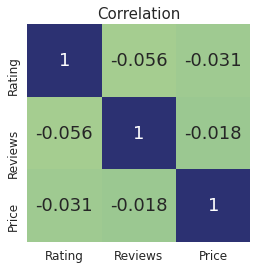

In [22]:
plt.figure(figsize=(4,4))
plt.title('Correlation', fontsize=15)
sns.heatmap(new.corr(), annot=True, cmap='crest', annot_kws={'size':18}, cbar=False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

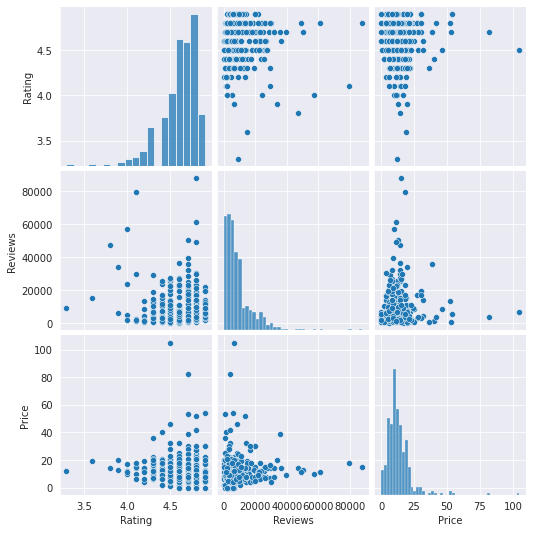

In [23]:
sns.pairplot(data=new, height=2.5)
plt.show()

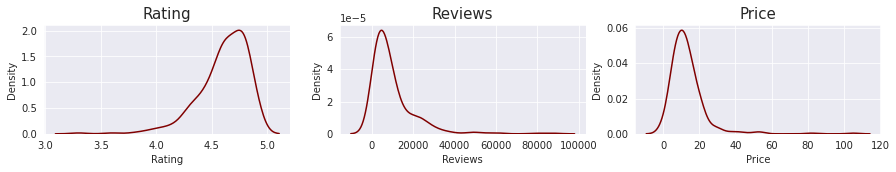

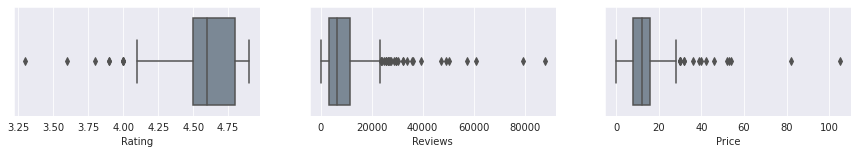

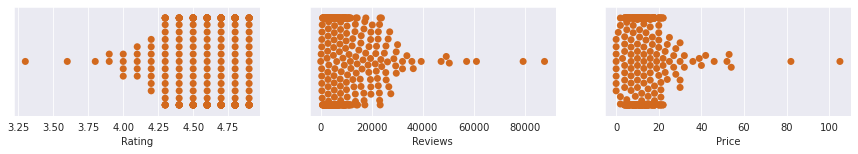

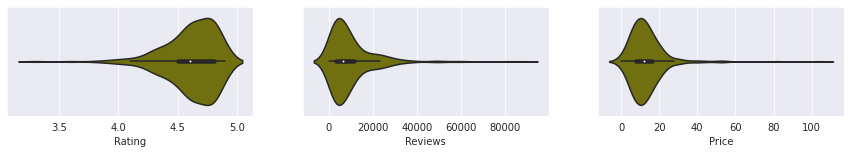

In [24]:
col = ['Rating','Reviews','Price']
fig, ax = plt.subplots(1,3, figsize=(15,2))
for i in range(0,3):
    ax[i].set_title(col[i], fontsize=15)
    sns.kdeplot(new[col[i]], ax=ax[i], color='#800000')
fig, ax = plt.subplots(1,3, figsize=(15,2))
for i in range(0,3):
    sns.boxplot(new[col[i]], ax=ax[i], color='#778899')
fig.show()
fig, ax = plt.subplots(1,3, figsize=(15,2))
for i in range(0,3):
    sns.swarmplot(new[col[i]], ax=ax[i], s=7, color='#D2691E')
fig.show()
fig, ax = plt.subplots(1,3, figsize=(15,2))
for i in range(0,3):
    sns.violinplot(new[col[i]], ax=ax[i], color='#808000')
fig.show()

,Count
Non Fiction,191
Fiction,160


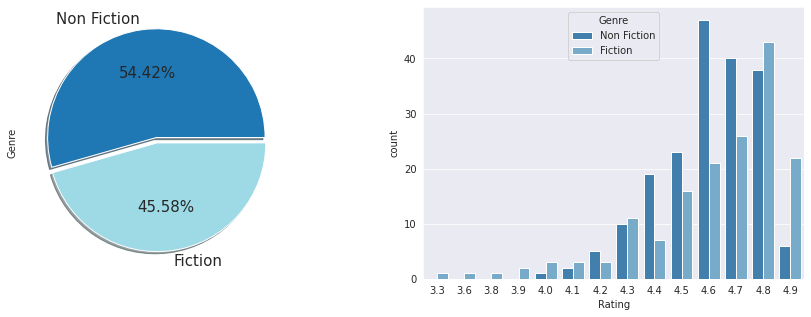

In [25]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
new.Genre.value_counts().plot.pie(shadow=True, autopct='%1.2f%%', cmap='tab20', 
                       textprops = {"fontsize":15}, explode=(0.05, 0), ax=ax[0])
sns.countplot(new.Rating, palette='tab20c', hue=new.Genre, ax=ax[1])
fig.show()
new.Genre.value_counts().to_frame('Count')

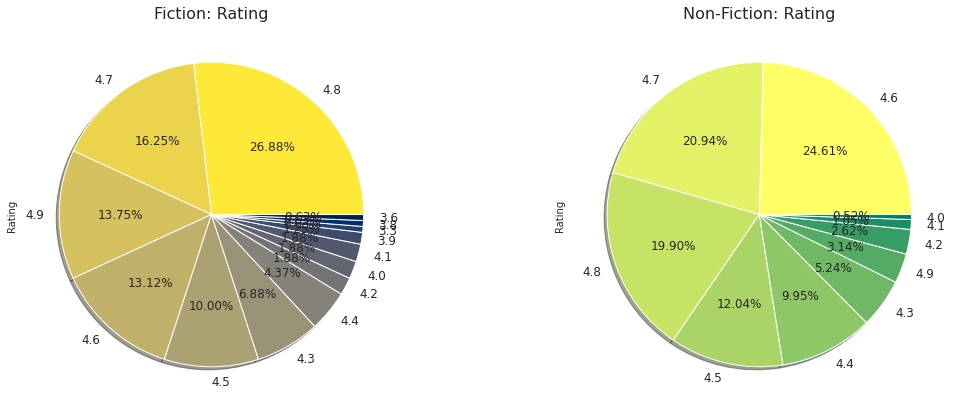

In [26]:
fig, ax = plt.subplots(1,2, figsize=(18,7))
ax[0].set_title('Fiction: Rating', fontsize=16)
new[new.Genre == 'Fiction']['Rating'].value_counts().plot.pie(shadow=True, autopct='%1.2f%%', cmap='cividis_r', 
                       textprops = {"fontsize":12}, ax=ax[0])
ax[1].set_title('Non-Fiction: Rating', fontsize=16)
new[new.Genre == 'Non Fiction']['Rating'].value_counts().plot.pie(shadow=True, autopct='%1.2f%%', cmap='summer_r', 
                       textprops = {"fontsize":12}, ax=ax[1])
fig.show()

## Reviwes & Rating

In [27]:
fiction = new[(new.Genre=='Fiction')].drop('Genre', axis=1).sort_values('Author')
non_fict = new[(new.Genre=='Non Fiction')].drop('Genre', axis=1).sort_values('Author')
fict_avg = fiction.groupby('Author').sum()
fict_avg['Rating'] = np.round(fiction.groupby('Author')['Rating'].mean(), decimals=1)
nonf_avg = non_fict.groupby('Author').sum()
nonf_avg['Rating'] = np.round(non_fict.groupby('Author')['Rating'].mean(), decimals=1)

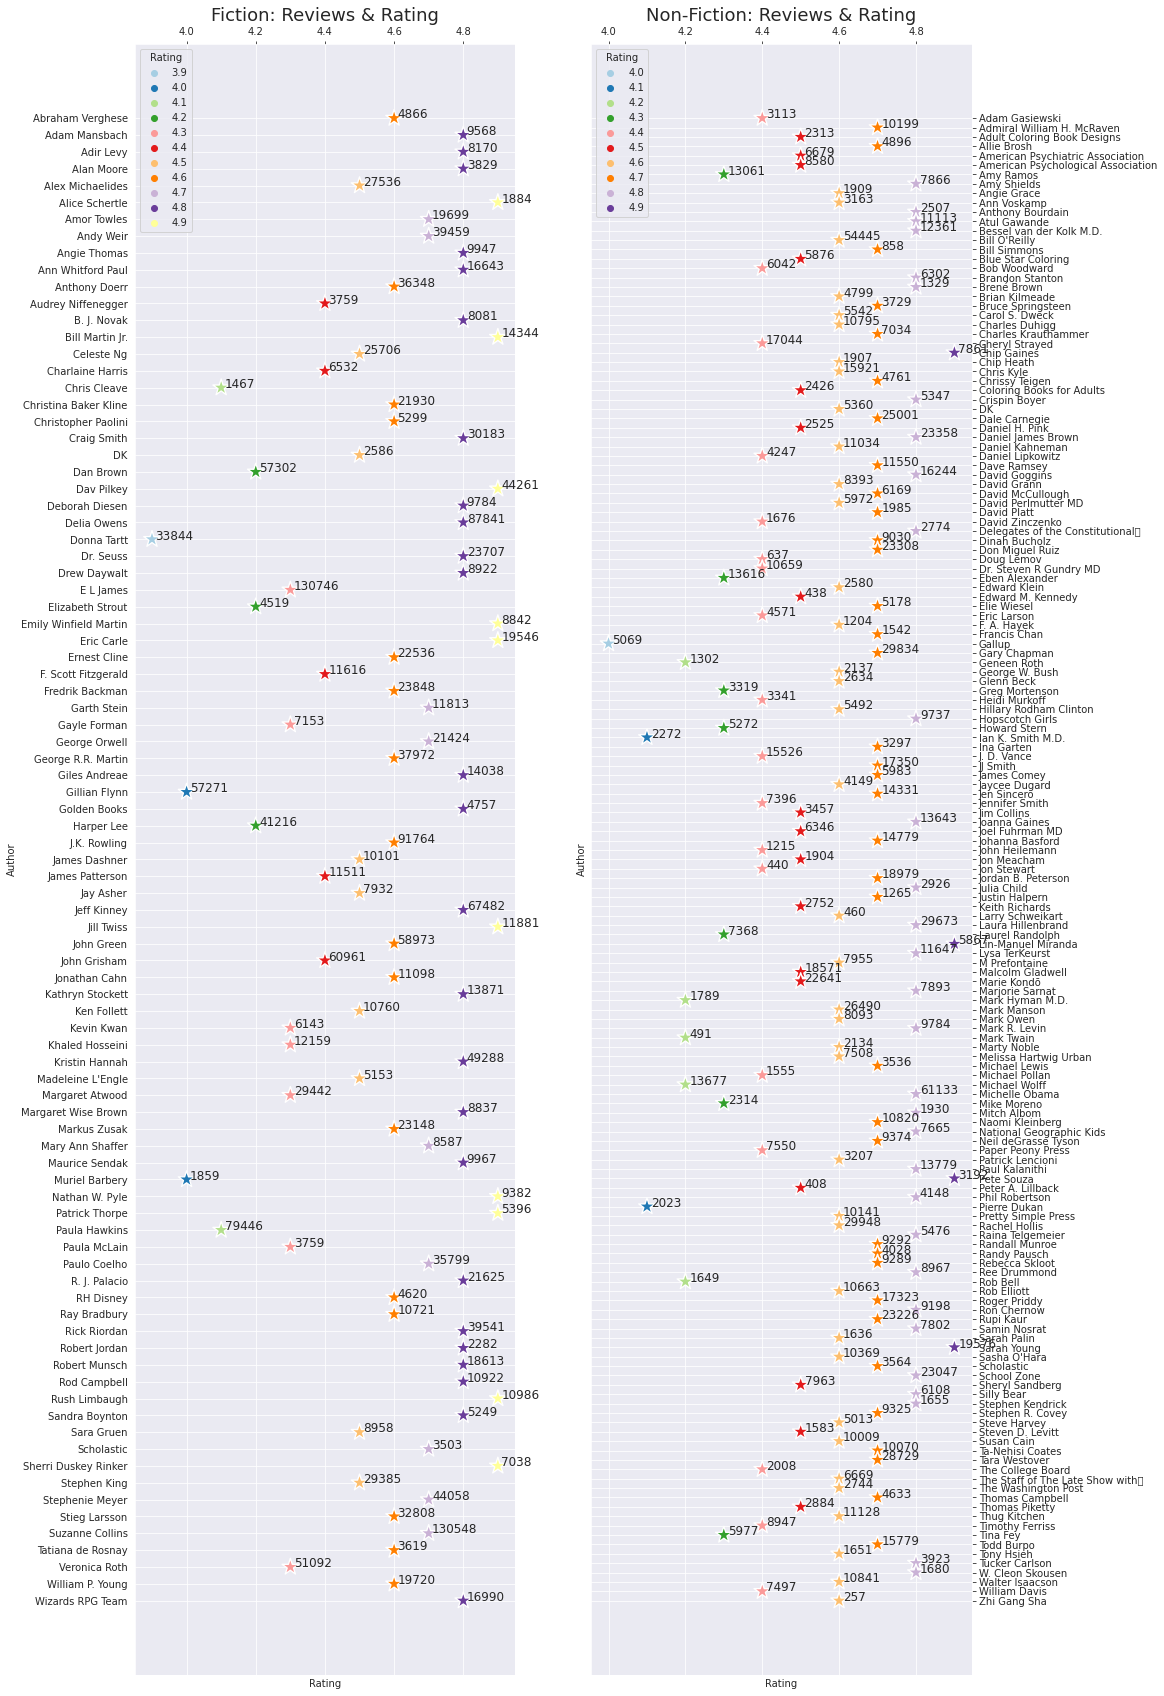

In [28]:
fig, ax = plt.subplots(1,2, figsize=(15,30))
ax[0].set_title('Fiction: Reviews & Rating', fontsize=18)
sns.scatterplot(fict_avg.Rating, fict_avg.index, marker='*', s=300, palette='Paired', hue=fict_avg.Rating, ax=ax[0])
for line in range(0,len(fict_avg)):
     ax[0].text(fict_avg.Rating[line]+0.01, fict_avg.index[line], fict_avg.Reviews[line], fontsize=12)
ax[0].xaxis.tick_top()

ax[1].set_title('Non-Fiction: Reviews & Rating', fontsize=18)
ax[1].yaxis.tick_right()
ax[1].xaxis.tick_top()
sns.scatterplot(nonf_avg.Rating, nonf_avg.index, marker='*', s=300, palette='Paired', hue=nonf_avg.Rating, ax=ax[1])
for line in range(0,len(nonf_avg)):
     ax[1].text(nonf_avg.Rating[line]+0.01, nonf_avg.index[line], nonf_avg.Reviews[line], fontsize=12)
fig.show()

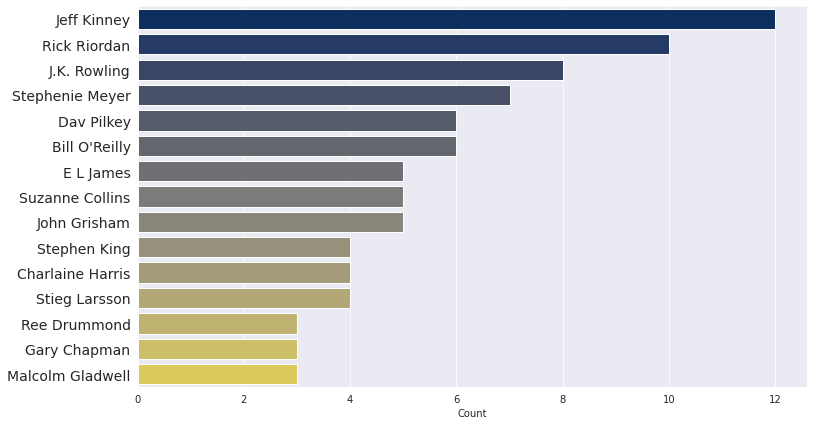

In [29]:
# Total Books Published
books = new.Author.value_counts().to_frame('Count')[:15]
plt.figure(figsize=(12,7))
plot = sns.barplot(books.Count, books.index, palette='cividis')
plt.yticks(fontsize=14)
plt.show()

## Jeff Kinney: Author of 'Diary of a Wimpy Kid' Series

In [30]:
jeff = new[new.Author == 'Jeff Kinney'].drop(['Author', 'Price'], axis=1)
jeff.Name = jeff.Name.replace(['Cabin Fever (Diary of a Wimpy Kid, Book 6)'], 'Cabin Fever')
jeff.Name = jeff.Name.replace(['Diary of a Wimpy Kid: Hard Luck, Book 8'], 'Hard Luck')
jeff.Name = jeff.Name.replace(['Diary of a Wimpy Kid: The Last Straw (Book 3)'], 'The Last Straw')
jeff.Name = jeff.Name.replace(['Diary of a Wimpy Kid: The Long Haul'], 'The Long Haul')
jeff.Name = jeff.Name.replace(['Dog Days (Diary of a Wimpy Kid, Book 4) (Volume 4)'], 'Dog Days')
jeff.Name = jeff.Name.replace(['Double Down (Diary of a Wimpy Kid #11)'], 'Double Down')
jeff.Name = jeff.Name.replace(['Old School (Diary of a Wimpy Kid #10)'], 'Old School')
jeff.Name = jeff.Name.replace(['The Meltdown (Diary of a Wimpy Kid Book 13)'], 'The Meltdown')
jeff.Name = jeff.Name.replace(['The Third Wheel (Diary of a Wimpy Kid, Book 7)'], 'The Third Wheel')
jeff.Name = jeff.Name.replace(['The Ugly Truth (Diary of a Wimpy Kid, Book 5)'], 'The Ugly Truth')
jeff.Name = jeff.Name.replace(['Wrecking Ball (Diary of a Wimpy Kid Book 14)'], 'Wrecking Ball')
jeff = jeff.sort_values('Reviews', ascending=False).set_index('Name')

In [31]:
jeff.style.set_properties(**{'background-color': '#EEE8AA'})

,Rating,Reviews,Genre
Name,,,
Wrecking Ball,4.900000,9413,Fiction
Hard Luck,4.800000,6812,Fiction
The Long Haul,4.800000,6540,Fiction
The Third Wheel,4.700000,6377,Fiction
Old School,4.800000,6169,Fiction
The Meltdown,4.800000,5898,Fiction
The Getaway,4.800000,5836,Fiction
Double Down,4.800000,5118,Fiction
Cabin Fever,4.800000,4505,Fiction


JEFF KINNEY
Total Books: 12
Total Reviews: 67482
Average Rating: 4.8


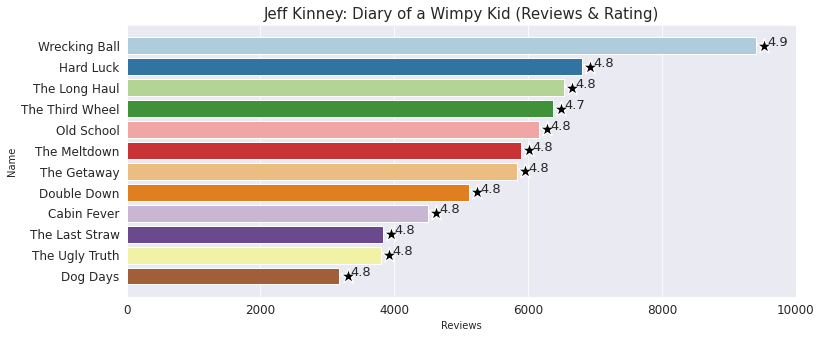

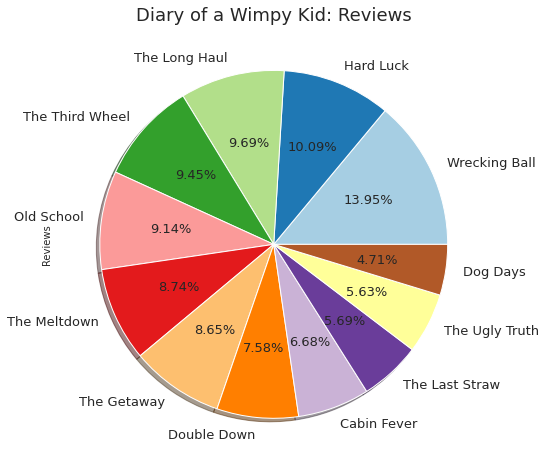

In [32]:
print('JEFF KINNEY')
print('Total Books:', len(jeff))
print('Total Reviews:', jeff.Reviews.sum())
print('Average Rating:', np.round(jeff.Rating.sum()/len(jeff), decimals=2))
plt.figure(figsize=(12,5))
plt.title('Jeff Kinney: Diary of a Wimpy Kid (Reviews & Rating)', fontsize=15)
sns.barplot(jeff.Reviews, jeff.index, palette='Paired')
sns.scatterplot(jeff.Reviews+120, jeff.index, marker='*', s=250, color='black')
for line in range(len(jeff)):
     plt.text(jeff.Reviews[line]+170, jeff.index[line], jeff.Rating[line], fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
plt.figure(figsize=(8,8))
plt.title('Diary of a Wimpy Kid: Reviews', fontsize=18)
jeff.Reviews.plot.pie(shadow=True, autopct='%1.2f%%', cmap='Paired', textprops = {"fontsize":13})
plt.show()

In [33]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [34]:
authors = fiction.Author.tolist()
def gen_cloud():
    word_cloud = {}
    for author in authors:
        if author not in word_cloud:
            word_cloud[author] = 0
        word_cloud[author] += 1
        
    image = np.array(Image.open('../input/amazon-logo/amazon.png'))
    cloud = WordCloud(background_color='white', mask=image).generate_from_frequencies(word_cloud)
    colors = ImageColorGenerator(image)
    cloud.recolor(color_func=colors)
    return cloud

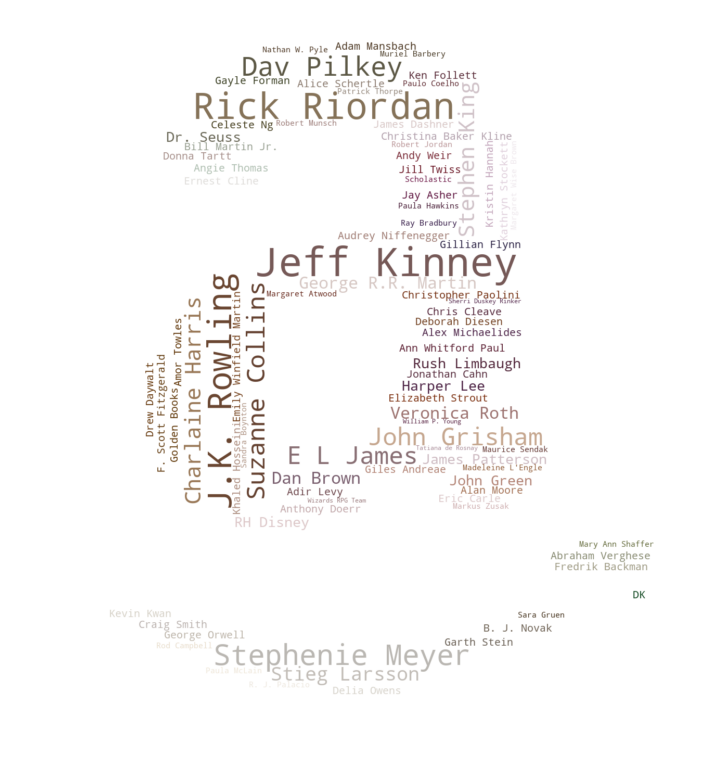

In [35]:
plt.figure(figsize=(15,14))
plt.imshow(gen_cloud(), interpolation='bilinear')
plt.axis('off')
plt.show()

## Thank You!